<a href="https://colab.research.google.com/github/birichie/AIHackaton/blob/main/NLP%20Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [2]:
# define input sequence
sequence_in = array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# define output sequence
sequence_out = array([11, 12, 13, 14, 15, 16, 17, 18, 19])

In [3]:
# reshape input into [samples, timesteps, features]
n_in = len(sequence_in)
sequence_in = sequence_in.reshape((1, n_in, 1))

In [4]:
# reshape output into [samples, timesteps, features]
n_out = len(sequence_out)
sequence_out = sequence_out.reshape((1, n_out, 1))

Epoch 1/2000
1/1 [==============================] - 5s 5s/step - loss: 234.6197
Epoch 2/2000
1/1 [==============================] - 0s 31ms/step - loss: 227.6731
Epoch 3/2000
1/1 [==============================] - 0s 22ms/step - loss: 220.8534
Epoch 4/2000
1/1 [==============================] - 0s 18ms/step - loss: 213.7221
Epoch 5/2000
1/1 [==============================] - 0s 24ms/step - loss: 205.8152
Epoch 6/2000
1/1 [==============================] - 0s 20ms/step - loss: 196.3520
Epoch 7/2000
1/1 [==============================] - 0s 21ms/step - loss: 184.5296
Epoch 8/2000
1/1 [==============================] - 0s 17ms/step - loss: 169.3070
Epoch 9/2000
1/1 [==============================] - 0s 20ms/step - loss: 149.2709
Epoch 10/2000
1/1 [==============================] - 0s 20ms/step - loss: 122.6149
Epoch 11/2000
1/1 [==============================] - 0s 19ms/step - loss: 88.2071
Epoch 12/2000
1/1 [==============================] - 0s 22ms/step - loss: 53.8735
Epoch 13/2000
1/1

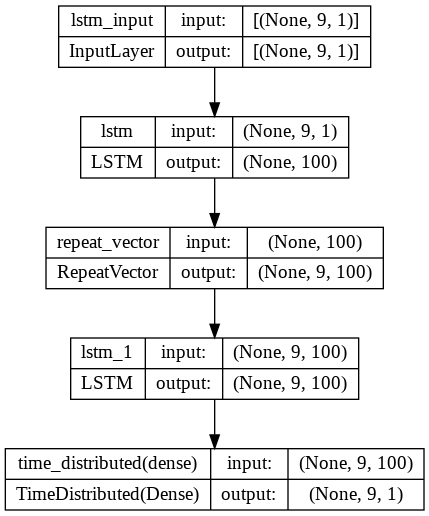

In [5]:

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(sequence_in, sequence_out, epochs=2000, verbose=1)
plot_model(model, show_shapes=True, to_file='reconstruct_lstm_autoencoder.png')

In [6]:
# demonstrate recreation (predict)
sequence_pre = array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# reshape input into [samples, timesteps, features]
n_pre = len(sequence_pre)
sequence_pre = sequence_pre.reshape((1, n_pre, 1))
yhat = model.predict(sequence_pre, verbose=0)
print("input values:",[1, 2, 3, 4, 5, 6, 7, 8, 9], '\n')
print("Predicted values:", yhat[0,:,0])

input values: [1, 2, 3, 4, 5, 6, 7, 8, 9] 

Predicted values: [11.       12.000002 12.999995 13.999994 14.999975 16.000006 17.000086
 17.999838 19.000063]
